# Plot showing velocity field and velocity at GNSS locations

In [33]:
import matplotlib.pyplot as plt
import rasterio
import numpy as np
from rasterio.plot import show
from rasterio.merge import merge
import xarray as xr
import pickle
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [29]:
figure_folder = 'figures'
data_folder = 'data'

## Load ice flow velocity data

In [9]:
vx_in = "/home/ram21/notebooks/brunt-is2-rifts/halloween/landsat/ANT_G0240_2015_vx.tif"
vy_in = "/home/ram21/notebooks/brunt-is2-rifts/halloween/landsat/ANT_G0240_2015_vy.tif"

vx15img = rasterio.open(vx_in)
vy15img = rasterio.open(vy_in)

vx15imgar = vx15img.read(1)
vy15imgar = vy15img.read(1)

vx15imgar[vx15imgar==-32767]=np.nan
vy15imgar[vy15imgar==-32767]=np.nan

vv15imgar = np.sqrt((vx15imgar**2) + (vy15imgar**2))


## Load velocity image

In [19]:
nc_file = xr.open_dataset('/data/fast0/datasets/ANT_G0120_0000.nc')
# display(nc_file)

vx = nc_file['vx']
vy = nc_file['vy']
vv = np.sqrt((vx**2)+(vy**2))

x = nc_file['x']
y = nc_file['y']
xmesh,ymesh = np.meshgrid(x,y)


<xarray.Dataset>
Dimensions:              (x: 45792, y: 36784)
Coordinates:
  * x                    (x) float64 -2.678e+06 -2.678e+06 ... 2.817e+06
  * y                    (y) float64 2.26e+06 2.26e+06 ... -2.154e+06 -2.154e+06
Data variables: (12/14)
    vx                   (y, x) float32 ...
    vy                   (y, x) float32 ...
    v                    (y, x) float32 ...
    vx_err               (y, x) float32 ...
    vy_err               (y, x) float32 ...
    v_err                (y, x) float32 ...
    ...                   ...
    count                (y, x) float32 ...
    chip_size_max        (y, x) float32 ...
    ocean                (y, x) float32 ...
    rock                 (y, x) float32 ...
    ice                  (y, x) float32 ...
    Polar_Stereographic  |S1 ...
Attributes:
    GDAL_AREA_OR_POINT:       Area
    date_created:             05-May-2019 19:16:06
    title:                    autoRIFT surface velocities
    author:                   Alex S. Gardner, JPL/NASA
    institution:              NASA Jet Propulsion Laboratory (JPL), Californi...
    scene_pair_type:          optical
    motion_detection_method:  feature
    motion_coordinates:       map

## Load Landsat

In [15]:
landsat_out_B2 = '/home/ram21/notebooks/brunt-is2-rifts/halloween/landsat/LC08_L1GT_184113_184114_20200220_B2_merge.tif'
landsat_out_B3 = '/home/ram21/notebooks/brunt-is2-rifts/halloween/landsat/LC08_L1GT_184113_184114_20200220_B3_merge.tif'
landsat_out_B4 = '/home/ram21/notebooks/brunt-is2-rifts/halloween/landsat/LC08_L1GT_184113_184114_20200220_B4_merge.tif'

landsat_names_B2 = ['/home/ram21/notebooks/brunt-is2-rifts/halloween/landsat/LC08_L1GT_184113_20200220_20201016_02_T2/LC08_L1GT_184113_20200220_20201016_02_T2_B2.TIF',
                    '/home/ram21/notebooks/brunt-is2-rifts/halloween/landsat/LC08_L1GT_184114_20200220_20201016_02_T2/LC08_L1GT_184114_20200220_20201016_02_T2_B2.TIF']
 
landsat_names_B3 = ['/home/ram21/notebooks/brunt-is2-rifts/halloween/landsat/LC08_L1GT_184113_20200220_20201016_02_T2/LC08_L1GT_184113_20200220_20201016_02_T2_B3.TIF',
                    '/home/ram21/notebooks/brunt-is2-rifts/halloween/landsat/LC08_L1GT_184114_20200220_20201016_02_T2/LC08_L1GT_184114_20200220_20201016_02_T2_B3.TIF']
  
landsat_names_B4 = ['/home/ram21/notebooks/brunt-is2-rifts/halloween/landsat/LC08_L1GT_184113_20200220_20201016_02_T2/LC08_L1GT_184113_20200220_20201016_02_T2_B4.TIF',
                    '/home/ram21/notebooks/brunt-is2-rifts/halloween/landsat/LC08_L1GT_184114_20200220_20201016_02_T2/LC08_L1GT_184114_20200220_20201016_02_T2_B4.TIF']

B2_files_to_mosaic = []
B3_files_to_mosaic = []
B4_files_to_mosaic = []

for fp2 in landsat_names_B2:
    src2 = rasterio.open(fp2)
    B2_files_to_mosaic.append(src2)
    
mosaic_B2, out_trans_B2 = merge(B2_files_to_mosaic)

for fp3 in landsat_names_B3:
    src3 = rasterio.open(fp3)
    B3_files_to_mosaic.append(src3)
    
mosaic_B3, out_trans_B3 = merge(B3_files_to_mosaic)

for fp4 in landsat_names_B4:
    src4 = rasterio.open(fp4)
    B4_files_to_mosaic.append(src4)

mosaic_B4, out_trans_B4 = merge(B4_files_to_mosaic)

out_meta = src2.meta.copy()
out_meta.update({'driver': 'GTiff',
                 'dtype': 'uint16',
                 'nodata': 0.0,
                 'width': mosaic_B2.shape[2],
                 'height': mosaic_B2.shape[1],
                 'count': 1,
                 'transform': out_trans_B2
                })
    
with rasterio.open(landsat_out_B2, "w", **out_meta) as dest:
    dest.write(mosaic_B2)
    
with rasterio.open(landsat_out_B3, "w", **out_meta) as dest:    
    dest.write(mosaic_B3)
    
with rasterio.open(landsat_out_B4, "w", **out_meta) as dest:   
    dest.write(mosaic_B4)    

img1_2 = rasterio.open(landsat_out_B2)
img1_3 = rasterio.open(landsat_out_B3)
img1_4 = rasterio.open(landsat_out_B4)

# crop to 99th percentile (stops dull images)
image1_2 = img1_2.read(1)
image1_2[image1_2 > np.percentile(image1_2,99)] = np.percentile(image1_2,99)
image1_3 = img1_3.read(1)
image1_3[image1_3 > np.percentile(image1_3,99)] = np.percentile(image1_3,99)
image1_4 = img1_4.read(1)
image1_4[image1_4 > np.percentile(image1_4,99)] = np.percentile(image1_4,99)

image1 = np.array([image1_4, image1_3, image1_2]).transpose(1,2,0)
norm1 = (image1 * (255 / np.max(image1))).astype(np.uint8)



## Load the processed GPS data

In [31]:
# Load the variables from the pickle file
with open(data_folder+'/processed-gps.pkl', 'rb') as f:
    loaded_variables = pickle.load(f)

# Access the variables (if needed)
hh00_x_mean = loaded_variables['hh00_x_mean']
tt05_x_mean = loaded_variables['tt05_x_mean']
ss00_x_mean = loaded_variables['ss00_x_mean']
tt04_x_mean = loaded_variables['tt04_x_mean']

hh00_y_mean = loaded_variables['hh00_y_mean']
tt05_y_mean = loaded_variables['tt05_y_mean']
ss00_y_mean = loaded_variables['ss00_y_mean']
tt04_y_mean = loaded_variables['tt04_y_mean']

hh00_vx = loaded_variables['hh00_vx']
tt05_vx = loaded_variables['tt05_vx']
ss00_vx = loaded_variables['ss00_vx']
tt04_vx = loaded_variables['tt04_vx']

hh00_vy = loaded_variables['hh00_vy']
tt05_vy = loaded_variables['tt05_vy']
ss00_vy = loaded_variables['ss00_vy']
tt04_vy = loaded_variables['tt04_vy']

hh00_v_rperp_x = loaded_variables['hh00_v_rperp_x']
tt05_v_rperp_x = loaded_variables['tt05_v_rperp_x']
ss00_v_rperp_x = loaded_variables['ss00_v_rperp_x']
tt04_v_rperp_x = loaded_variables['tt04_v_rperp_x']

hh00_v_rperp_y = loaded_variables['hh00_v_rperp_y']
tt05_v_rperp_y = loaded_variables['tt05_v_rperp_y']
ss00_v_rperp_y = loaded_variables['ss00_v_rperp_y']
tt04_v_rperp_y = loaded_variables['tt04_v_rperp_y']

print("Variables have been loaded successfully.")

Variables have been loaded successfully.


## Load shapefiles

In [26]:
rift_path = pickle.load( open( '/data/fast1/arc/feature_outlines/halloween_path.pickle', "rb" ) )
riftx,rifty = np.array(rift_path.xy)

<ipython-input-26-13631fc031d2>:1: UserWarning: Unpickling a shapely <2.0 geometry object. Please save the pickle again; shapely 2.1 will not have this compatibility.
  rift_path = pickle.load( open( '/data/fast1/arc/feature_outlines/halloween_path.pickle', "rb" ) )


## Make the plot

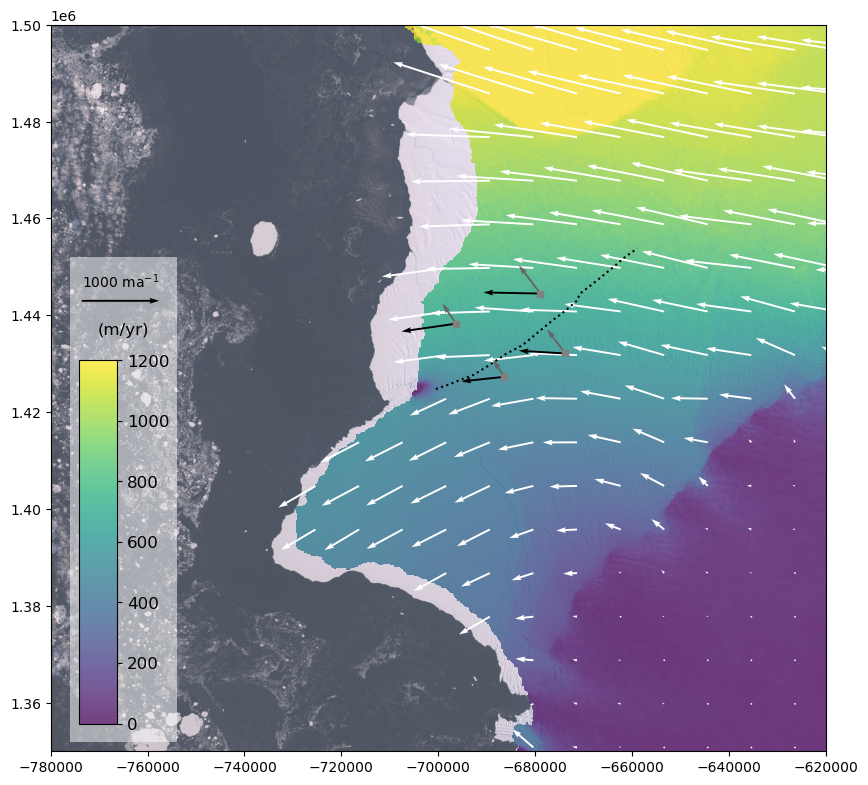

In [43]:
fig=plt.figure(figsize=(10,10))
ax12=fig.add_subplot(1,1,1)

image_hidden = ax12.imshow(vv15imgar,alpha=0.75,vmin=0,vmax=1200)
show(norm1.transpose(2,0,1), transform=img1_2.transform, ax=ax12)
show(vv15imgar,transform=vx15img.transform,ax=ax12,alpha=0.75,vmin=0,vmax=1200)

skip=75
Q = ax12.quiver(xmesh[ ::skip, ::skip],
               ymesh[ ::skip, ::skip],
               vx[ ::skip, ::skip], 
               vy[ ::skip, ::skip], scale = 10000, color='w', width=0.0025)


plt.plot(hh00_x_mean,hh00_y_mean,'s',color='gray',markersize=5)
plt.plot(tt05_x_mean,tt05_y_mean,'s',color='gray',markersize=5)
plt.plot(ss00_x_mean,ss00_y_mean,'s',color='gray',markersize=5)
plt.plot(tt04_x_mean,tt04_y_mean,'s',color='gray',markersize=5)

xi=[hh00_x_mean,tt05_x_mean,ss00_x_mean,tt04_x_mean]
yi=[hh00_y_mean,tt05_y_mean,ss00_y_mean,tt04_y_mean]
vix=[hh00_vx,tt05_vx,ss00_vx,tt04_vx]
viy=[hh00_vy,tt05_vy,ss00_vy,tt04_vy]

Q1 = ax12.quiver(xi,yi,vix,viy, scale = 10000, color='k', width=0.0025)

xrp=[hh00_x_mean,tt05_x_mean,ss00_x_mean,tt04_x_mean]
yrp=[hh00_y_mean,tt05_y_mean,ss00_y_mean,tt04_y_mean]
vrpx=[hh00_v_rperp_x,tt05_v_rperp_x,ss00_v_rperp_x,tt04_v_rperp_x]
vrpy=[hh00_v_rperp_y,tt05_v_rperp_y,ss00_v_rperp_y,tt04_v_rperp_y]

Q2 = ax12.quiver(xrp,yrp,vrpx,vrpy, scale = 10000, color=[0.4,0.4,0.4], width=0.0025)

ax12.plot(riftx,rifty,'k:')

xmin = -780000
xmax = -620000
ymin = 1350000 
ymax = 1500000

ax12.set_xlim(xmin,xmax)
ax12.set_ylim(ymin,ymax)

ax12.add_patch(Rectangle((-776000,1352000),22000,100000,
                    edgecolor = 'none',
                    facecolor = 'white',
                    alpha = 0.5))

cbaxes = inset_axes(ax12, width="5%", height="50%",loc='lower left',borderpad=2)
cbar = plt.colorbar(image_hidden,cax=cbaxes)
cbar.ax.tick_params(labelsize=12)

ax12.annotate("(m/yr)",(-765000,1437000),ha='center',va='center',fontsize=12)

ax12.quiverkey(Q1, 0.09,0.62, 1000, r'1000 ma$^{-1}$')

output = figure_folder+'/figS01_vmap_div.png'
plt.savefig(output, dpi=200, bbox_inches='tight')

plt.show()
